<a href="https://colab.research.google.com/github/ChintPatel/CMPE255-advanced-dimensionality-reduction/blob/main/Tabular_Dim_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Required Libraries
!pip install umap-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import umap
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [3]:
# Paths
csv_path = "/content/netflix_titles.csv"

# Load the Dataset
df = pd.read_csv(csv_path)
print(f"Dataset Shape: {df.shape}")
print(df.head())
# Preprocessing the duration column to extract numeric values
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

# Updated Preprocessor for Handling Missing Values and Encoding
categorical_features = ['type', 'rating', 'release_year']
numerical_features = ['duration']  # Now contains numeric values

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

X = preprocessor.fit_transform(df)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.toarray())

print(f"Processed Dataset Shape: {X_scaled.shape}")


Dataset Shape: (8807, 12)
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  

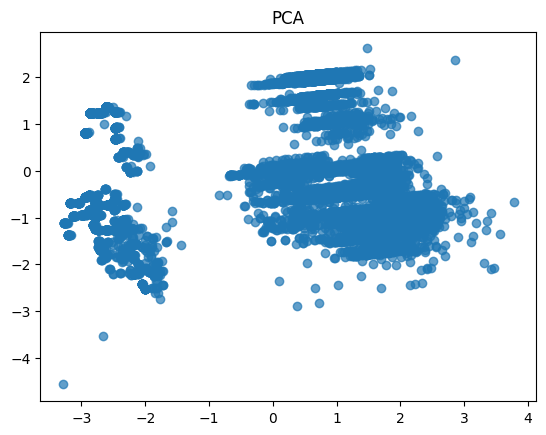

In [4]:
# Dimensionality Reduction Techniques
#  PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.title("PCA")
plt.show()

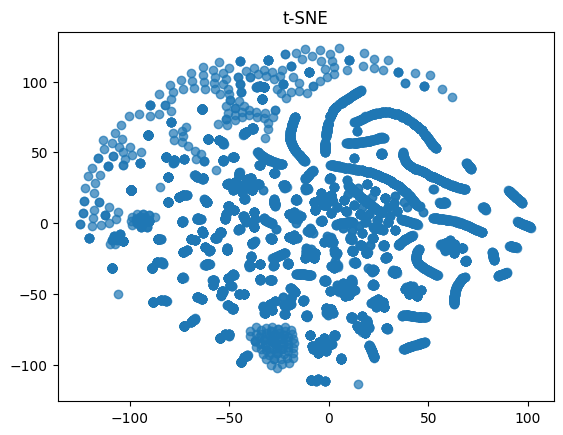

In [5]:
#  t-SNE
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_scaled)

plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7)
plt.title("t-SNE")
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited at iteration 1047 with accuracies 
[6.92741237e-15 1.60112795e-06 2.69186990e-06 2.39975952e-06]
not reaching the requested tolerance 2.682209014892578e-06.
Use iteration 738 instead with accuracy 
1.4359380842147383e-06.

  _, diffusion_map = lobp

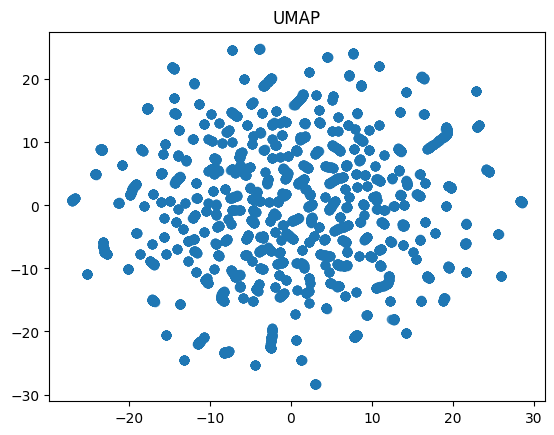

In [6]:
# UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.7)
plt.title("UMAP")
plt.show()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy

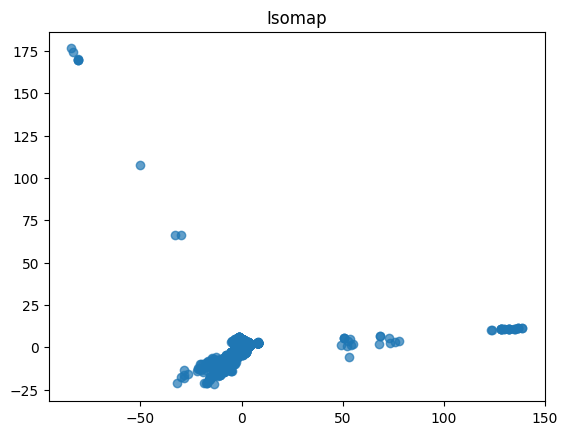

In [8]:
# Isomap
isomap = Isomap(n_neighbors=5, n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], alpha=0.7)
plt.title("Isomap")
plt.show()


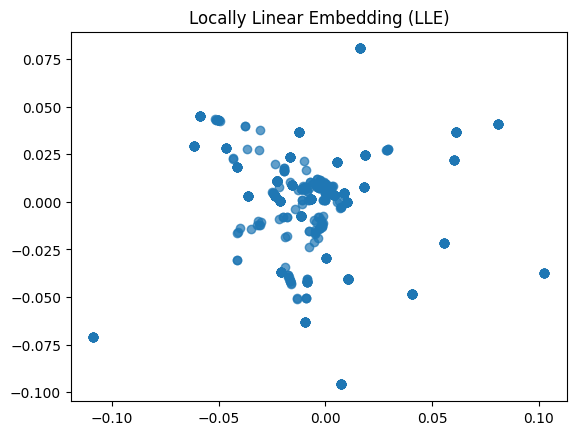

In [11]:

from sklearn.manifold import LocallyLinearEmbedding

# Reduce dataset size if necessary
sample_size = min(1000, X_scaled.shape[0])
X_scaled_subset = X_scaled[:sample_size]

# Locally Linear Embedding (LLE) with dense solver
lle = LocallyLinearEmbedding(
    n_neighbors=10,
    n_components=2,
    method="standard",
    eigen_solver="dense",  # Use dense solver for singular matrices
    reg=1e-3               # Regularization term to stabilize computation
)
X_lle = lle.fit_transform(X_scaled_subset)

# Plot the results
plt.figure()
plt.scatter(X_lle[:, 0], X_lle[:, 1], alpha=0.7)
plt.title("Locally Linear Embedding (LLE)")
plt.show()


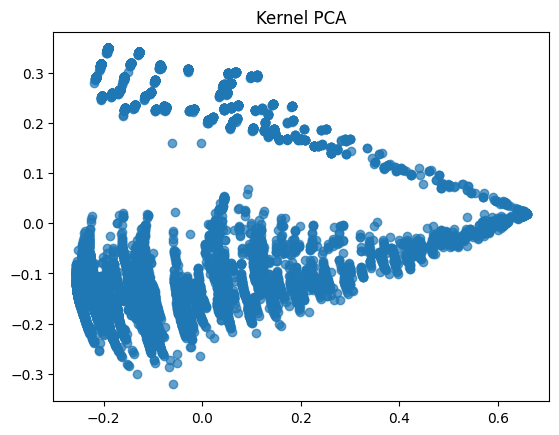

In [12]:
# Kernel PCA
kpca = KernelPCA(n_components=2, kernel="rbf")
X_kpca = kpca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], alpha=0.7)
plt.title("Kernel PCA")
plt.show()


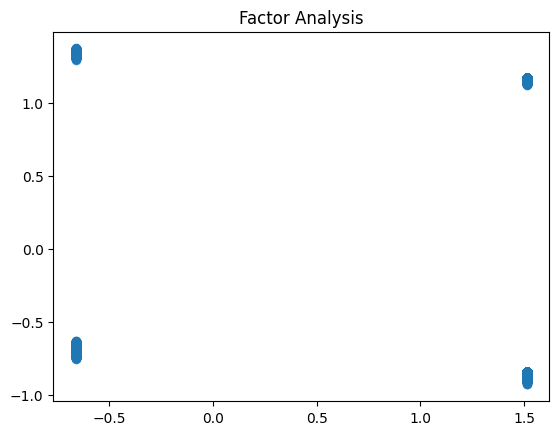

In [13]:
# 8. Factor Analysis
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_fa[:, 0], X_fa[:, 1], alpha=0.7)
plt.title("Factor Analysis")
plt.show()


Epoch 1/50
276/276 [==============================] - 2s 2ms/step - loss: 1.0203
Epoch 2/50
276/276 [==============================] - 1s 2ms/step - loss: 0.9865
Epoch 3/50
276/276 [==============================] - 1s 2ms/step - loss: 0.9812
Epoch 4/50
276/276 [==============================] - 1s 2ms/step - loss: 0.9790
Epoch 5/50
276/276 [==============================] - 1s 2ms/step - loss: 0.9780
Epoch 6/50
276/276 [==============================] - 1s 2ms/step - loss: 0.9778
Epoch 7/50
276/276 [==============================] - 1s 2ms/step - loss: 0.9775
Epoch 8/50
276/276 [==============================] - 1s 2ms/step - loss: 0.9774
Epoch 9/50
276/276 [==============================] - 1s 2ms/step - loss: 0.9778
Epoch 10/50
276/276 [==============================] - 1s 2ms/step - loss: 0.9775
Epoch 11/50
276/276 [==============================] - 1s 2ms/step - loss: 0.9773
Epoch 12/50
276/276 [==============================] - 1s 2ms/step - loss: 0.9772
Epoch 13/50
276/276 [====

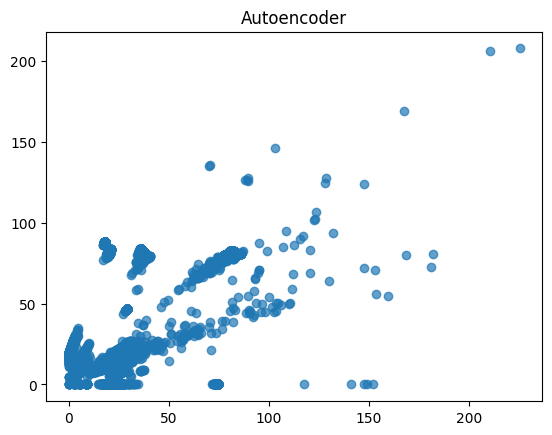

In [14]:
# 9. Autoencoder
input_dim = X_scaled.shape[1]
encoding_dim = 2  # 2D for visualization

# Autoencoder Model
input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation="relu")(input_layer)
encoder = Dense(64, activation="relu")(encoder)
encoder_output = Dense(encoding_dim, activation="relu")(encoder)

decoder = Dense(64, activation="relu")(encoder_output)
decoder = Dense(128, activation="relu")(decoder)
decoder_output = Dense(input_dim, activation="sigmoid")(decoder)

autoencoder = Model(input_layer, decoder_output)
encoder_model = Model(input_layer, encoder_output)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, verbose=1)

# Encode the data
X_autoencoded = encoder_model.predict(X_scaled)

# Plot Autoencoder
plt.figure()
plt.scatter(X_autoencoded[:, 0], X_autoencoded[:, 1], alpha=0.7)
plt.title("Autoencoder")
plt.show()
